Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

The wine quality data set typically includes the following features:

1. Fixed Acidity: Primarily related to tartaric acid found in wine. It   influences the taste and freshness.
2. Volatile Acidity: The amount of acetic acid in wine, which at high levels can lead to an unpleasant vinegar taste.
3. Citric Acid: Adds freshness and flavor to the wine.
4. Residual Sugar: The amount of sugar remaining after fermentation stops. It contributes to the sweetness of the wine.
5. Chlorides: The amount of salt in the wine. Higher levels can give a salty taste.
6. Free Sulfur Dioxide: SO2 prevents microbial growth and oxidation.
7. Total Sulfur Dioxide: Sum of free and bound forms of SO2; excessive amounts can negatively affect taste and health.
8. Density: Closely related to the alcohol and sugar content in the wine.
9. pH: Describes how acidic or basic the wine is. Affects taste and microbial stability.
10. Sulphates: Contributes to SO2 levels and can affect the taste and preservation of wine.
11. Alcohol: The alcohol content of the wine. Generally, higher alcohol content can enhance wine quality.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Common Techniques for Handling Missing Data:

Deletion:

1. Listwise Deletion: Remove any row with missing data.

    Advantages: Simple to implement.

    Disadvantages: Can lead to significant data loss, reducing statistical power.

2. Pairwise Deletion: Only exclude missing values from specific analyses.

    Advantages: Retains more data compared to listwise.

    Disadvantages: Can be complex to implement and interpret.
    Imputation:

3. Mean/Median Imputation: Replace missing values with the mean or median of the column.

    Advantages: Simple and quick to implement.

    Disadvantages: Can distort the variance and relationships between features.

4. Mode Imputation: Replace missing values with the most frequent value (useful for categorical data).

Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Key factors that could affect students' performance include:

1. Socioeconomic Status: Includes family income, parental education, and occupation.
2. Study Habits: Time spent on homework, attendance in class, and engagement with learning material.
3. School Environment: Teacher quality, school resources, and peer influence.
4. Psychological Factors: Stress levels, motivation, and self-esteem.
5. Health: Nutrition, sleep patterns, and overall physical health.
    Analyzing Factors Using Statistical Techniques:

Descriptive Statistics: Summarize the central tendency, dispersion, and shape of the dataset’s distribution.

1. Correlation Analysis: Identify relationships between different factors and exam performance.
2. Regression Analysis: Understand the impact of one or more predictors on exam performance.
3. ANOVA: Determine if there are any statistically significant differences between the means of three or more independent groups.
4. Factor Analysis: Identify underlying relationships between variables.

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Process of Feature Engineering:

1. Feature Selection:

    1. Filter Methods: Use statistical measures to score and select features.
    2. Wrapper Methods: Use machine learning models to evaluate feature subsets.
    3. Embedded Methods: Perform feature selection during the model training process.
    
2. Feature Transformation:

    1. Normalization/Standardization: Scale features to have a mean of 0 and standard deviation of 1.
    2. Encoding Categorical Variables: Use techniques like one-hot encoding or label encoding.
    3. Polynomial Features: Create interaction terms to capture relationships between features.
    4. Binning: Convert continuous variables into categorical bins.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [15]:
##Loading the Data:
import pandas as pd
df = pd.read_csv('../Project/winequality-red.csv',sep=';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [16]:
## Summary Statistics:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


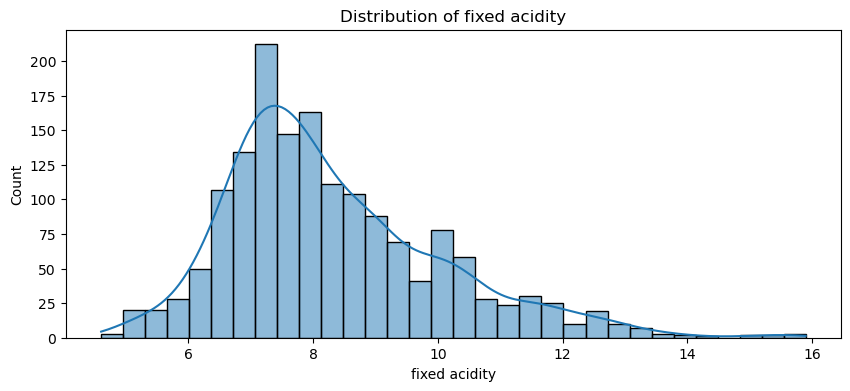

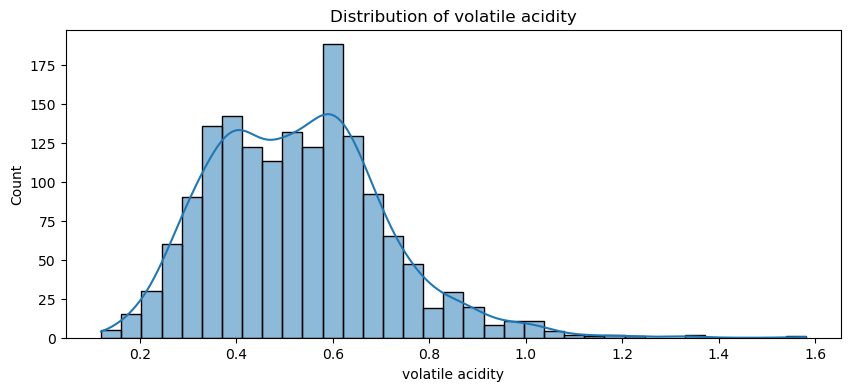

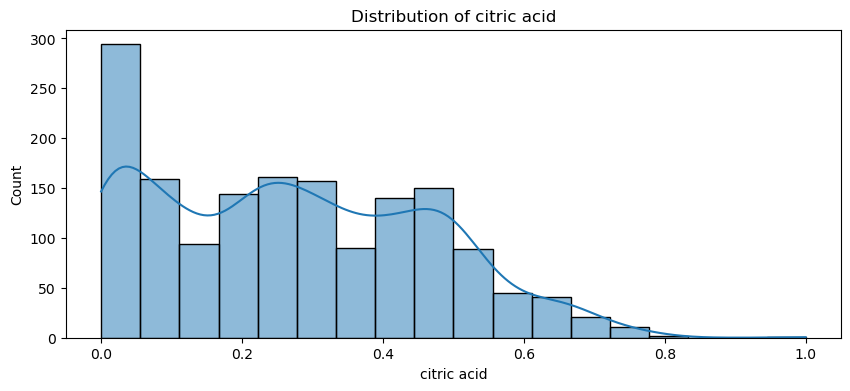

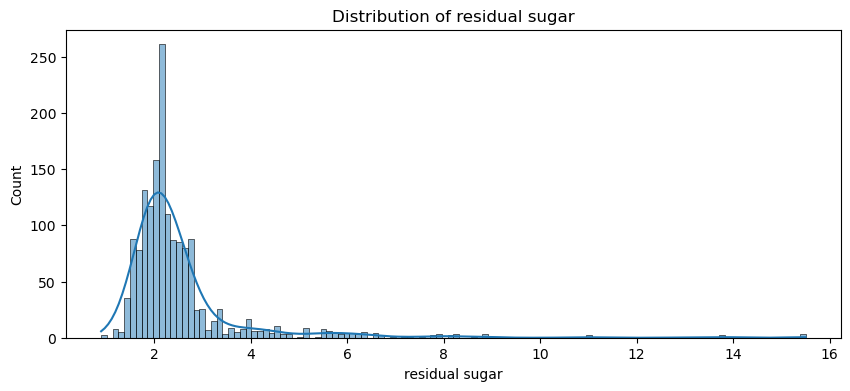

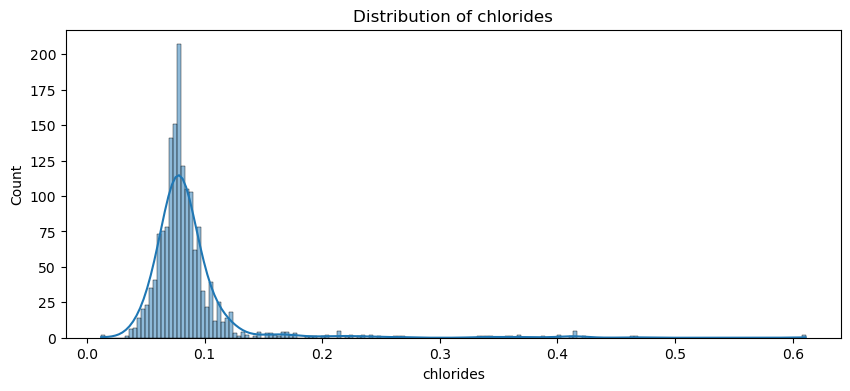

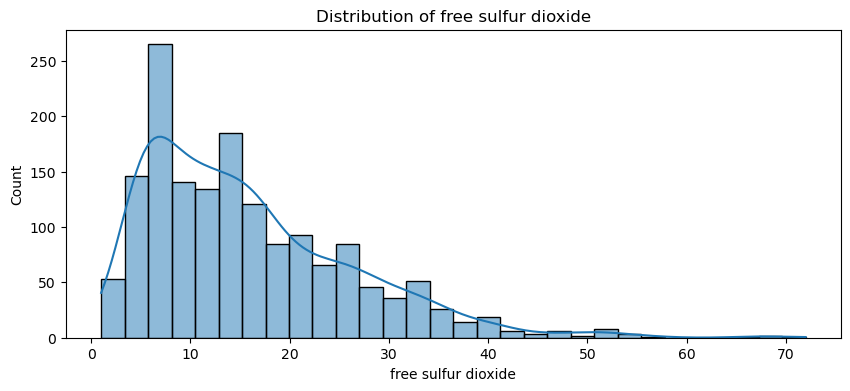

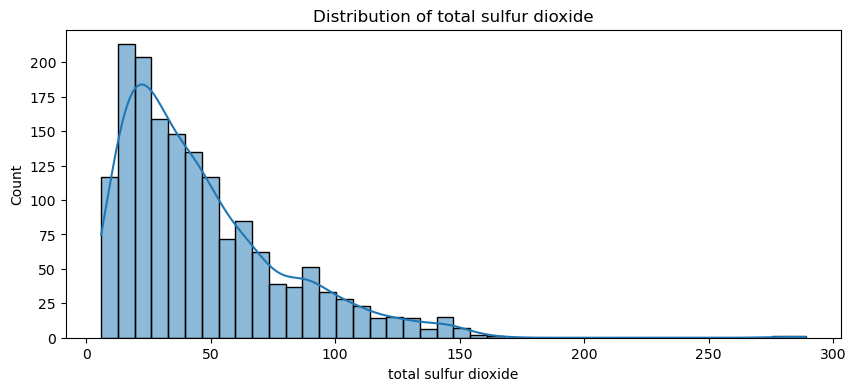

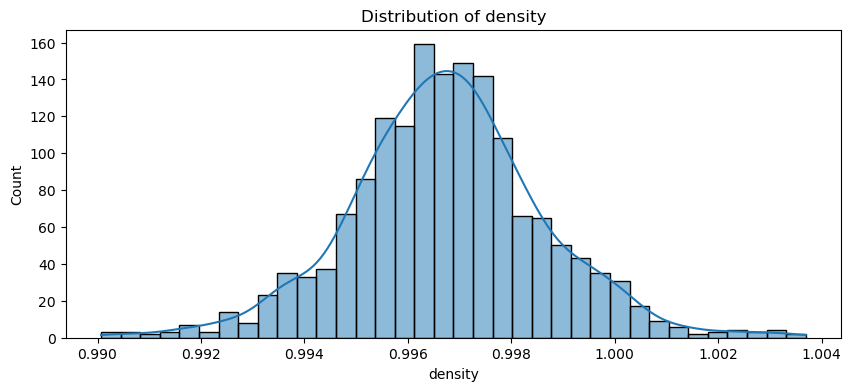

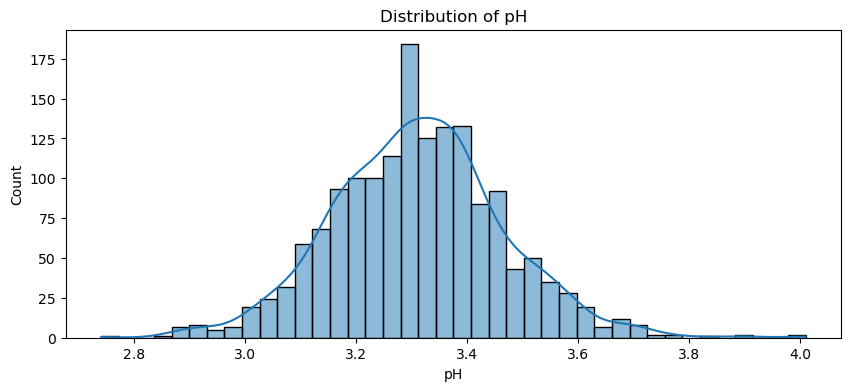

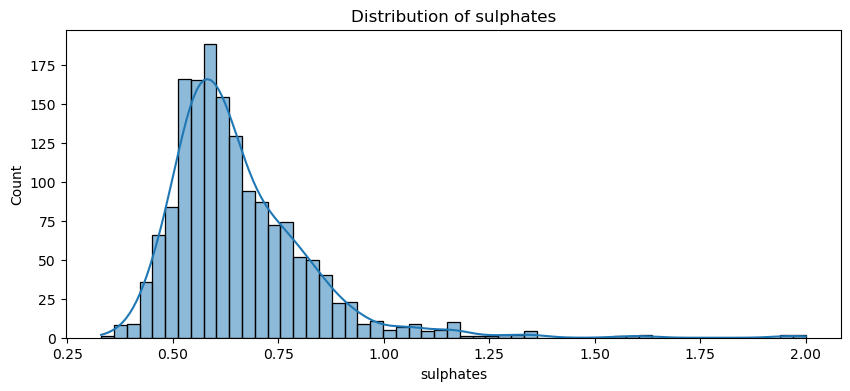

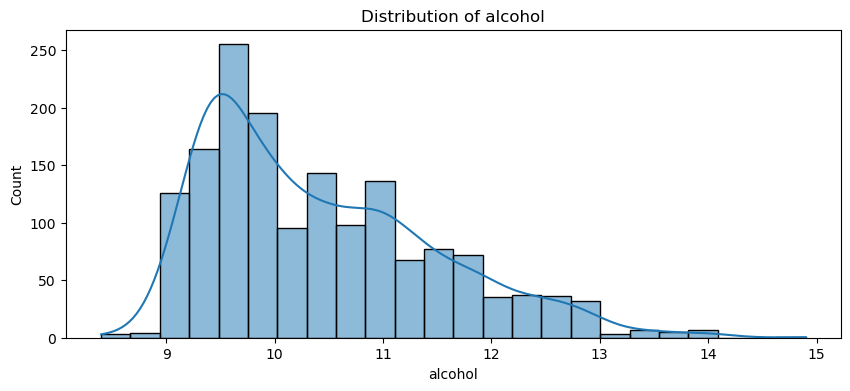

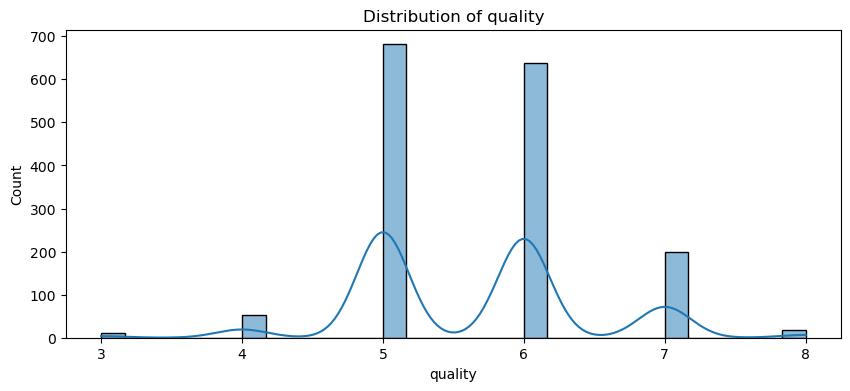

In [17]:
##Distribution of Each Feature:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [19]:
## Identifying Non-Normal Features:
from scipy.stats import shapiro

non_normal_features = []
for column in df.columns:
    stat, p = shapiro(df[column])
    if p < 0.05:
        non_normal_features.append(column)
non_normal_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Transformations for Normality:

1. Log Transformation: Useful for right-skewed distributions.
2. Square Root Transformation: Useful for moderate skewness.
3. Box-Cox Transformation: A more flexible transformation.

In [20]:
##Standardize the Data:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [21]:
## Applying PCA:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)


PCA()

In [22]:
## Explained Variance:
import numpy as np

explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance >= 0.90) + 1
print(f'Minimum number of principal components to explain 90% variance: {num_components}')


Minimum number of principal components to explain 90% variance: 8
